In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
try:
    # Lecture du csv
    df = pd.read_csv('combined_data.csv')
    # affichage pour vérification
    print(df.head())
except FileNotFoundError:
    print("Le fichier CSV n'a pas été trouvé.")
except pd.errors.EmptyDataError:
    print("Le fichier CSV est vide.")
except pd.errors.ParserError:
    print("Erreur lors de l'analyse du fichier CSV.")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

                             original_title     budget     revenue  runtime  \
0                                    Avatar  237000000  2787965087      162   
1  Pirates of the Caribbean: At World's End  300000000   961000000      169   
2                                   Spectre  245000000   880674609      148   
3                     The Dark Knight Rises  250000000  1084939099      165   
4                               John Carter  260000000   284139100      132   

   vote_count evaluation  
0       11800      moyen  
1        4500      moyen  
2        4466      moyen  
3        9106       bien  
4        2124      moyen  


In [ ]:
# Calcule le nombre de valeurs manquantes 
missing_data = df.isnull().sum()

# Calcule le nombre de zéros dans chaque colonne
zero_data = (df == 0).sum()

combined_data = missing_data + zero_data

# Affichage du total des données manquantes et des zéros par colonne
print("\nTotal de données manquantes (NaN) et de zéros par colonne :")
# Affiche uniquement les colonnes avec des valeurs manquantes ou des zéros
print(combined_data[combined_data > 0])



Total de données manquantes (NaN) et de zéros par colonne :
budget        1005
revenue       1392
vote_count      49
dtype: int64


In [15]:
# Suppression des lignes contenant des zéros dans n'importe quelle colonne
df = df[(df != 0).all(axis=1)]

In [ ]:
# Compte les occurrences de chaque valeur dans la colonne 'evaluation'
evaluation_counts = df['evaluation'].value_counts()

print(evaluation_counts)


evaluation
moyen       2842
bien         217
mediocre     190
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Compte le nombre de lignes pour chaque valeur de 'evaluation'
counts = df['evaluation'].value_counts()

# Nombre de lignes de la catégorie 'mediocre'
num_mediocre = counts['mediocre']

# Calcul le nombre de lignes à supprimer pour 'bien' et 'moyen'
to_remove_bien = counts['bien'] - num_mediocre
to_remove_moyen = counts['moyen'] - num_mediocre

# Crée une liste pour stocker les DataFrames à concaténer
frames = []

# Supprime les lignes de 'bien' si nécessaire
if to_remove_bien > 0:
    bien_to_keep = df[df['evaluation'] == 'bien'].sample(n=num_mediocre, random_state=1)
    frames.append(bien_to_keep)

# Supprime les lignes de 'moyen' si nécessaire
if to_remove_moyen > 0:
    moyen_to_keep = df[df['evaluation'] == 'moyen'].sample(n=num_mediocre, random_state=1)
    frames.append(moyen_to_keep)

# Ajoute toutes les lignes de 'médiocre'
mediocre = df[df['evaluation'] == 'mediocre']
frames.append(mediocre)

df = pd.concat(frames)
df.reset_index(drop=True, inplace=True)
print(df['evaluation'].value_counts())


evaluation
bien        190
moyen       190
mediocre    190
Name: count, dtype: int64


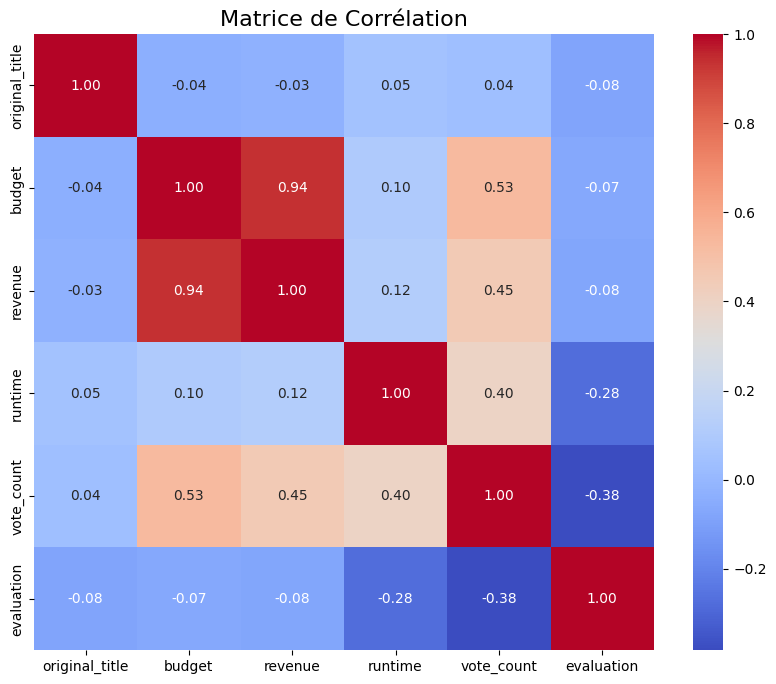

In [ ]:
# Convertit les colonnes 'original_title' et 'evaluation' en valeurs numériques
df['original_title'] = df['original_title'].astype('category').cat.codes
df['evaluation'] = df['evaluation'].astype('category').cat.codes

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Crée une heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation", fontsize=16)
plt.show()


In [20]:
df.to_csv('cleaned_data.csv', index=False)